<h2>Dẫn nhập</h2>

Ở bài viết trước (Asymptotics - tiệm cận), ta đã thảo luận về khoảng tin cậy sử dụng định lý giới hạn trung tâm (Central Limit Theorem (CLT)) và phân phối chuẩn. Cả hai đều cần kích thước mẫu dữ liệu lớn và công thức tính khoảng tin cậy bằng Est +/- qnorm *std error(Est). Trong đó, Est (estimated value) là giá trị ước lượng (ví dụ trung bình mẫu) với độ lỗi chuẩn (standard error). qnorm thể hiện giá trị phân vị (quantile) cụ thể từ phân phối chuẩn.

Ta cũng đề cập đến thống kê $Z=(X'-\mu)/(\sigma/\sqrt n)$ có phân phối chuẩn. Phân phối đã được chuẩn hóa (normalized) này trông rất "đẹp" vì ta có mean=0 và variance=1.

Như vậy $\mu$ và $\sigma$ của phân phối chuẩn đã biết và không thay đổi. Bây giờ, ta sẽ định nghĩa thống kê t, trông khá giống Z. Ta định nghĩa $t=(X'-\mu)/(s/\sqrt n)$. Như thống kê Z, t có trọng tâm tại 0. Điểm khác biệt duy nhất là độ lệch chuẩn của quần thể (population), $\sigma$, trong Z được thay thế bởi độ lệch của của tập dữ liệu mẫu (sample) trong t. Do đó, phân phối của thống kê t độc lập với trung bình và phương sai quần thể. Thay vì vậy, t phụ thuộc vào kích thước tập dữ liệu mẫu n.

Kết quả là, đối với phân phối t, công thức tính khoảng tin cậy tương tự như những gì ta đã làm ở phần trước. Tuy nhiên, thay vì lấy phân vị cho phân phối chuẩn, ta sử dụng phân vị cho phân phối t. Cho nên, công thức sẽ là Est +/- t-quantile *std error(Est). Điểm lưu ý là ta sẽ sử dụng độ lệch chuẩn của tập dữ liệu mẫu khi ước lượng độ lỗi chuẩn của Est. <a href="https://youtu.be/hV4pdjHCKuA">Xem thêm</a>

Khoảng tin cậy t rất tiện dụng, nếu bạn được chọn một trong hai với phân phối chuẩn, bạn nên chọn phân phối t. Ta sẽ thấy khi tập dữ liệu càng lớn, t xấp xĩ phân phối chuẩn.

<h2>Phân phối t</h2>

Phân phối t, được phát minh bởi William Gosset vào năm 1908, có phần đuôi "mập" hơn phân phối chuẩn. Thay vì có hai thông số mean và variance như phân phối chuẩn, phân phối t chỉ có duy nhất thông số bậc tự do (degrees of freedom (df)).

Khi df tăng, phân phối t trông giống phân phối chuẩn, trọng tâm tiến gần về 0. t cũng giả định dữ liệu là iid từ Gaussian, nên thống kê $(X' - \mu)/(s/\sqrt n)$ có n-1 bậc tự do. <a href="https://youtu.be/ikddPfZx_so">Xem thêm</a>

Để minh họa điều trên, ta xây dựng hàm myplot với đối số là df. Hàm này sẽ xuất ra biểu đồ phân phối t với số bậc tự do là df.


In [1]:
library("ggplot2")
library("repr")
options(repr.plot.width=4, repr.plot.height=4)


k <- 1000
xvals <- seq(-5, 5, length = k)
myplot <- function(df){
    d <- data.frame(y = c(dnorm(xvals), dt(xvals, df)),
                  x = xvals,
                  dist = factor(rep(c("Normal", "T"), c(k,k))))
    g <- ggplot(d, aes(x = x, y = y)) 
    g <- g + geom_line(size = 2, aes(colour = dist))
    print(g)
}

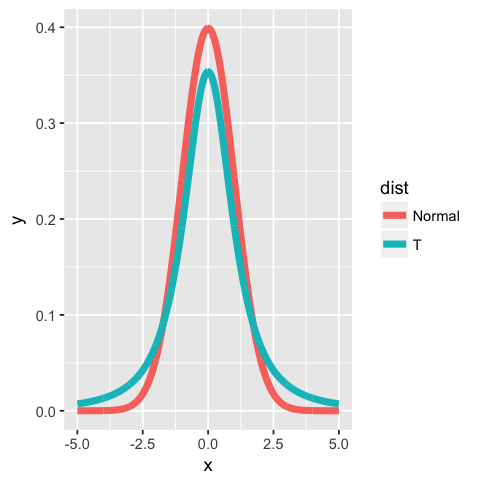

In [2]:
# Ta thử hàm myplot với bậc tự do là 2
myplot(2)

Ta thấy phần "mông" của phân phối t (màu xanh) không cao như phân phối chuẩn. Theo đó, hai phần "đuôi" của phân phối t nhận nhiều giá trị hơn nên dày hơn phân phối chuẩn. Chú ý rằng với bậc tự do là 2, ta chỉ có 3 điểm dữ liệu. Tiếp theo, ta thử myplot với df là 20.


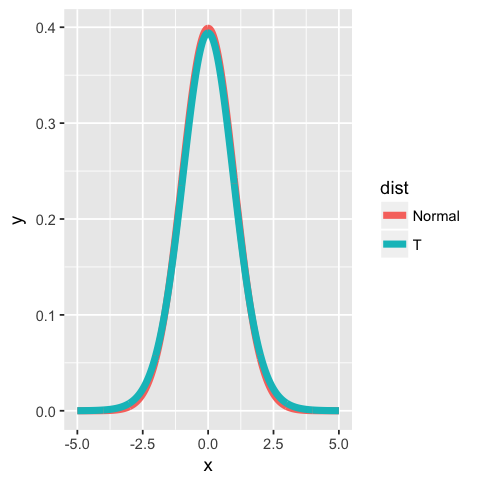

In [3]:
myplot(20)

Cả hai phân phối gần như chồng lên nhau khi ta nâng df lên. Một cách khác để so sánh hai phân phối này là sử dụng phân vị (quantiles). Ta xây dựng hàm myplot2 xuất ra biểu đồ với đường màu xanh nhạt thể hiện phân vị của phân phối chuẩn và đường màu đen thể hiện phân vị của phân phối t. Cả hai phân vị đều bắt đầu ở phần trăm phân vị 50th đến 99th.

Ta thử dùng hàm myplot2 với 2 df


In [4]:
pvals <- seq(.5, .99, by = .01)
myplot2 <- function(df){
  d <- data.frame(n= qnorm(pvals),t=qt(pvals, df),
                  p = pvals)
  g <- ggplot(d, aes(x= n, y = t))
  g <- g + geom_abline(size = 2, col = "lightblue")
  g <- g + geom_line(size = 2, col = "black")
  g <- g + geom_vline(xintercept = qnorm(0.975))
  g <- g + geom_hline(yintercept = qt(0.975, df))
  print(g)
}

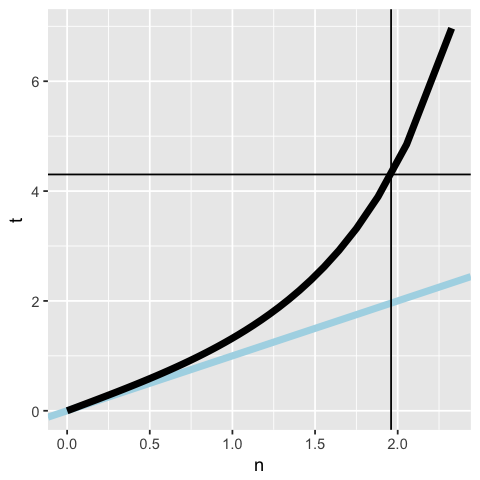

In [5]:
myplot2(2)

Khoảng cách giữa hai đường này thể hiện sai biệt về kích thước phân vị của chúng. Lưu ý đường kẻ mảnh hơn theo chiều ngang và dọc. Chúng thể hiện 0.975 phân vị của phân phối t và chuẩn. Dù gì thì bạn cũng nhận ra vị trí của đường kẻ dọc là 1.96 như bài viết về tiệm cận (Asymptotics).

Kiểm tra vị trí đường kẻ ngang bằng cách sử dụng hàm qt() của R với đối số phân vị là 0.975 và bậc tự do df là 2.


In [6]:
qt(.975,2)

[1] 4.302653

Ta thấy giá trị này trùng với đường kẻ ngang cắt qua trong biểu đồ trên. Bây giờ, ta chạy hàm myplot2 với 20 df.

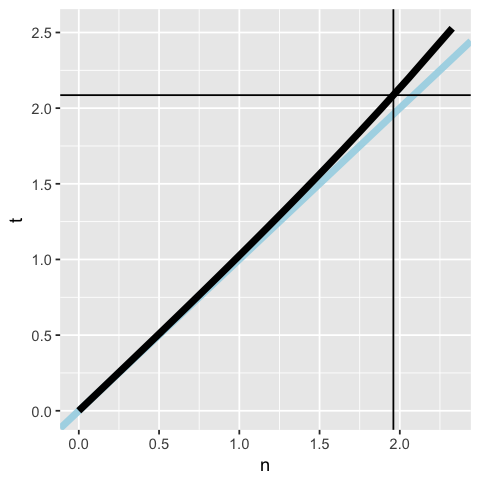

In [7]:
myplot2(20)

Hai phân vị ngày càng gần nhau hơn khi bậc tự do càng cao. Tại phần trăm phân vị 97.5, phân vị của t vẫn lớn hơn phân phối chuẩn. Đây là luật Student.

<h2>Student's Rules</h2>

Điều này có nghĩa là khoảng tin cậy của t luôn rộng hơn phân bố chuẩn. Do việc ước lượng độ lệch chuẩn phát sinh tính toán không chắc chắn nên kết quả tin cậy cần rộng hơn.

Vậy khoảng tin cậy t được định nghĩa bởi $X' +/- t_{n-1}*s/\sqrt n$. Trong đó, $t_{n-1}$ là phân vị. Khoảng tin cậy t giả định rằng tập dữ liệu là idd từ phân phối chuẩn. Mặc dù với giả định cứng nhắc, phép tính này hoạt động hiệu quả với bất kì phân bố dữ liệu nào có tính đối xứng và có dạng hình chuông.

Tuy nhiên khoảng tin cậy t không phải lúc nào cũng khả dụng. Với phân phối lệch, tinh thần giả định (trọng tâm nằm ở 0) của khoảng tin cậy t bị vi phạm. Ta có thể điều chỉnh lại bằng cách lấy logs hay sử dụng giá trị trung vị median.

Đối với dữ liệu rời rạc như phân phối nhị phân, ta cần áp dụng các khoảng tin cậy khác ngoài t. Tuy nhiên, các quan sát cặp (paired observations) thường được phân tích bởi khoảng tin cậy t bằng cách lấy sai biệt giữa các dữ liệu quan sát.

<strong>Nguồn tham khảo:</strong> <a href="http://swirlstats.com/" target="_blank" rel="noopener">http://swirlstats.com/</a>